# **Prediction using Unsupervised ML**

**From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.**

**● Use R or Python or perform this task**

**● Dataset : https://bit.ly/3kXTdox**

# **Author: Sandesh Bhat**

# **Task #2**

Clustering using Kmeans algorithm from sci-kit. Optimal clster determined using Elbow method.Visualized using matplotlib and seaborn python library. 



---



# **Import the libraries**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Import the dataset**

In [2]:
# enter the path here
path = ' '
dataframe = pd.read_csv(os.path.join(path, 'Iris.csv'))
dataframe.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# **Data Preprocessing**

Drop cloumn ID since it is not useful for performing clustering.

In [3]:
dataframe = dataframe.drop(columns = ['Id'], axis = 1)
dataframe.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# **Encode categorical data** (Optional)

Encodes the specified column into the several categories depending on the values. 0, 1 and 2 in this case.


In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataframe['Species'] = le.fit_transform(dataframe['Species'])

Displays the different classes in the categorical data encoded.

In [5]:
labels = le.classes_
labels

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

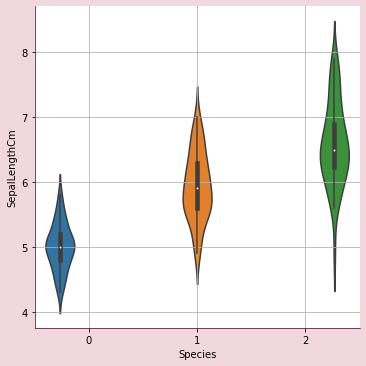

In [18]:
# catplot for the Sepal Length to visualize the 3 classes
sns.catplot(x="Species", y="SepalLengthCm", hue="Species",kind = "violin", data = dataframe)
plt.grid(True)

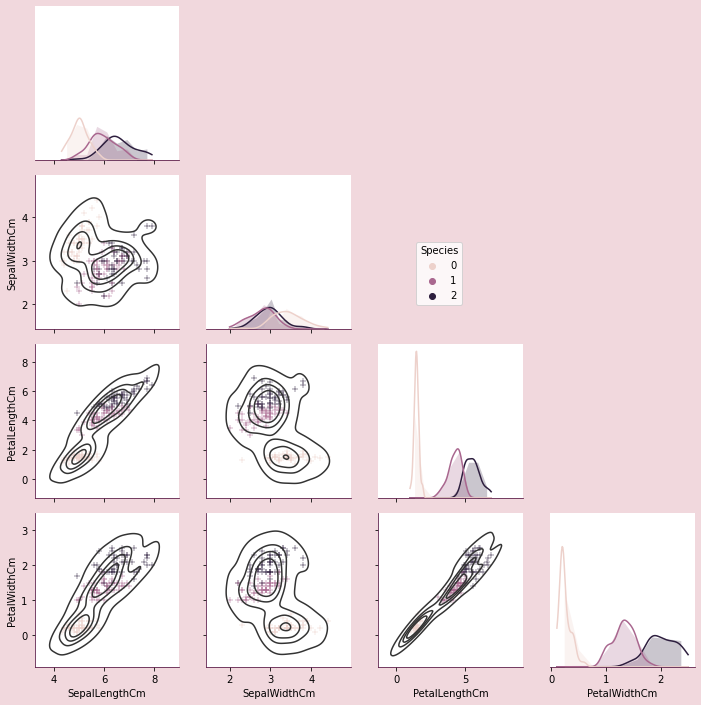

In [19]:
# more visualization
g = sns.PairGrid(dataframe, hue="Species", corner=True)
g.map_lower(sns.kdeplot, hue=None, levels=5, color=".2")
g.map_lower(sns.scatterplot, marker="+")
g.map_diag(sns.histplot, element="poly", linewidth=0, kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61, .6))

# **Take care of missing data**

In [8]:
dataframe.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**No missing data**

In [9]:
# To generate descriptive statistics.
dataframe.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [10]:
# to check the datatypes of the columns
dataframe.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species            int64
dtype: object

In [11]:
# to randomize the dataset
dataframe = dataframe.sample(n=len(dataframe), random_state=0)
dataframe.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
114,5.8,2.8,5.1,2.4,2
62,6.0,2.2,4.0,1.0,1
33,5.5,4.2,1.4,0.2,0
107,7.3,2.9,6.3,1.8,2
7,5.0,3.4,1.5,0.2,0


In [12]:
X = dataframe.iloc[: , :].values

Fit the values for 12 clusters to plot the elbow graph

In [13]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,13):
  kmeans = KMeans(n_clusters = i , init = 'k-means++', random_state = 1)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

# **Elbow Method**

Plot a graph of WCSS vs Clusters to obtain the optimal number of cluster needed.

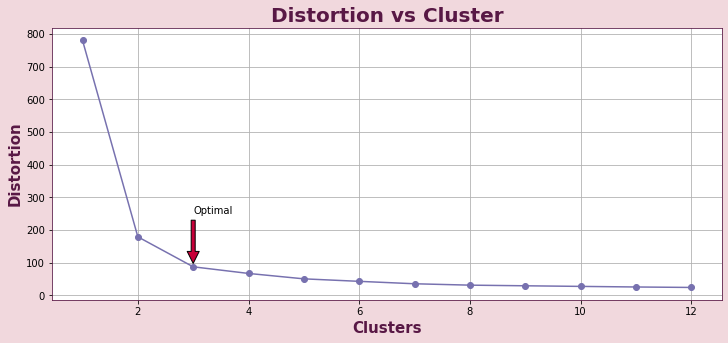

In [20]:
plt.figure(figsize=(12,5))
plt.plot(range(1,13) , wcss,c = '#7771AF', marker='o')
plt.title('Distortion vs Cluster', c = '#581845', fontsize=20, fontweight='bold')
plt.xlabel('Clusters', c = '#581845', fontweight='bold', fontsize=15)
plt.ylabel('Distortion', c = '#581845', fontweight='bold', fontsize=15)
plt.rc_context({'axes.edgecolor':'#581845', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'#F1D8DD'})
plt.annotate('Optimal', xy=(3, 90), xytext=(3, 250), arrowprops=dict(facecolor='#c70039', shrink=0.05))
plt.grid(True)
plt.show()

From the above graph the optimal number of clusters is 3

In [15]:
global Clusters 
Clusters = 3

Fit the model for the optimal cluster number

In [16]:
kmeans = KMeans(n_clusters = Clusters , init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

# **Visualise**

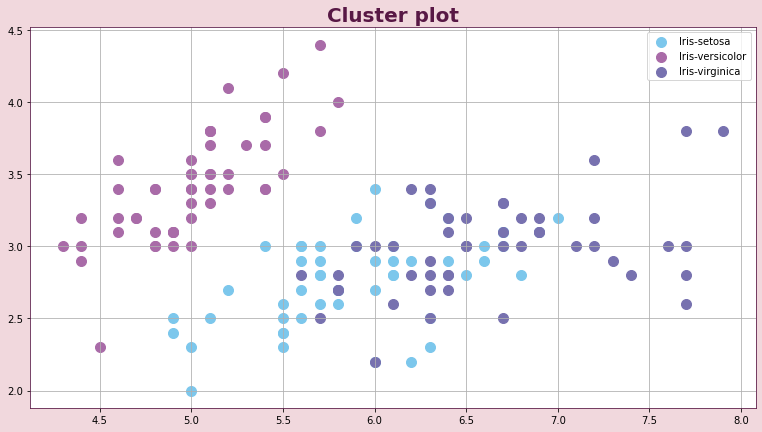

In [21]:
colors = ['#7CC7EC', '#A96BA8', '#7771AF', '#F2BFDF']
plt.figure(figsize=(13,7))
for _ in range (Clusters):
  plt.scatter(X[y_kmeans == _, 0], X[y_kmeans == _, 1], s = 100, c = colors[_], label = labels[_])
plt.grid(True)
plt.rc_context({'axes.edgecolor':'#581845', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'#F1D8DD'})
plt.title('Cluster plot', fontweight = 'bold', fontsize = 20, c = '#581845')
plt.legend()
plt.show()

**The 3 different clusters are displayed using 3 colors**